Using Colab cache for faster access to the 'insurance-claim-analysis-demographic-and-health' dataset.
Path to dataset files: /kaggle/input/insurance-claim-analysis-demographic-and-health
Files in dataset folder:
['insurance_data.csv']
Using dataset file: /kaggle/input/insurance-claim-analysis-demographic-and-health/insurance_data.csv

Columns in dataset:
['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children', 'smoker', 'region', 'claim']

First 5 rows:
   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  11

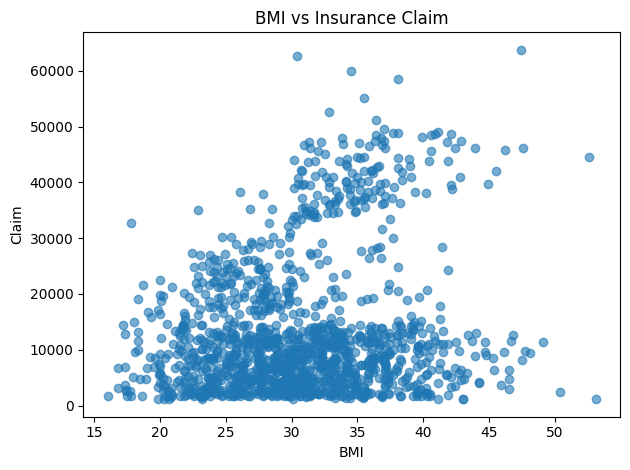

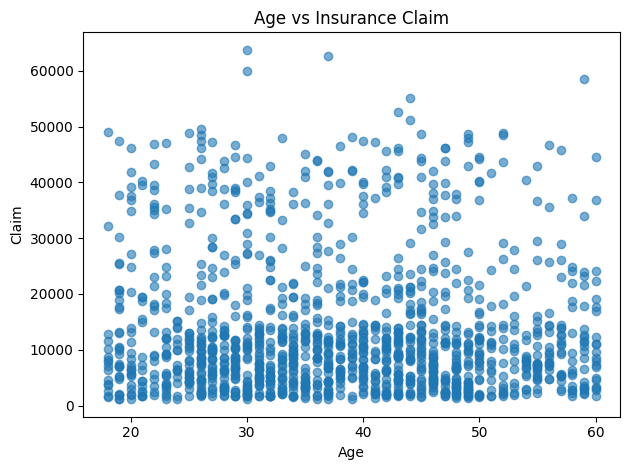

/tmp/ipython-input-4146403673.py:97: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(smoker_groups, labels=df["smoker"].unique())


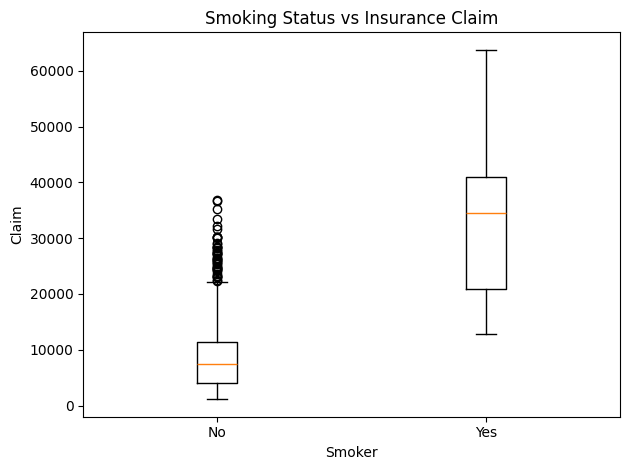

Text(0.5, 1.0, 'Correlation Heatmap (Numeric Features)')

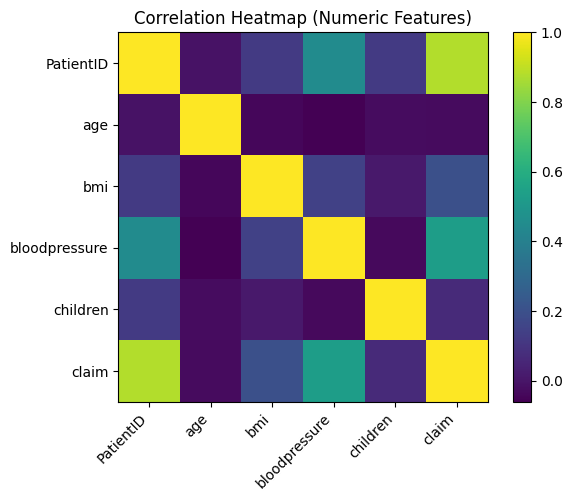

In [ ]:
# Task 4: Predicting Insurance Claim Amounts 

# Introduction and Problem Statement
# In this task, we aim to estimate medical insurance claim amounts based on
# personal and lifestyle information. The main goal is to build a regression
# model that can predict insurance charges using features such as age, BMI,
# number of children, region, and smoking status. This helps insurers better
# understand cost drivers and estimate future medical expenses.

# Dataset Understanding and Description
# We use the Medical Cost Personal Dataset, which contains information about
# individuals, including their age, sex, BMI, number of children, smoking status,
# region, and the corresponding medical insurance charges.
# The target variable is 'charges', representing the medical claim amount.
# In this task, we will:
# - Explore the relationships between features and insurance charges
# - Focus on key factors like BMI, age, and smoking status
# - Prepare the data for training a regression model.

# Conclusion Summarizing Key Insights
# By the end of this task, we will have a Linear Regression model that estimates
# insurance charges based on personal features. Visualizations of BMI, age,
# and smoking status against charges will highlight which factors have the
# strongest impact on costs. Evaluation using MAE and RMSE will show how well
# the model performs and how accurate its predictions are in practical terms.

import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

plt.style.use("default")

# ==============================
# 1. Download & load dataset
# ==============================
path = kagglehub.dataset_download(
    "thedevastator/insurance-claim-analysis-demographic-and-health"
)
print("Path to dataset files:", path)

print("Files in dataset folder:")
print(os.listdir(path))

csv_files = [f for f in os.listdir(path) if f.lower().endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the downloaded dataset folder.")

data_path = os.path.join(path, csv_files[0])
print("Using dataset file:", data_path)

df = pd.read_csv(data_path)

print("\nColumns in dataset:")
print(df.columns.tolist())

print("\nFirst 5 rows:")
print(df.head())

# Expected columns:
# index, PatientID, age, gender, bmi, bloodpressure, diabetic, children, smoker, region, claim

# ==============================
# 2. Set target and drop useless index column
# ==============================
TARGET_COLUMN = "claim"

if TARGET_COLUMN not in df.columns:
    raise ValueError(
        f"Target column '{TARGET_COLUMN}' not found. "
        f"Available columns are: {df.columns.tolist()}"
    )

# Drop 'index' if present because it's just a row index, not a feature
if "index" in df.columns:
    df = df.drop(columns=["index"])

target = TARGET_COLUMN

# ==============================
# 3. Basic cleaning
# ==============================
print("\nMissing values per column:")
print(df.isnull().sum())

# Simple strategy: drop rows with any missing values
df = df.dropna()

# ==============================
# 4. Visualizations:
#    How BMI, age, and smoking status impact claim
# ==============================

# (a) BMI vs Claim
plt.figure()
plt.scatter(df["bmi"], df[target], alpha=0.6)
plt.title("BMI vs Insurance Claim")
plt.xlabel("BMI")
plt.ylabel("Claim")
plt.tight_layout()
plt.show()

# (b) Age vs Claim
plt.figure()
plt.scatter(df["age"], df[target], alpha=0.6)
plt.title("Age vs Insurance Claim")
plt.xlabel("Age")
plt.ylabel("Claim")
plt.tight_layout()
plt.show()

# (c) Smoking status vs Claim (boxplot)
plt.figure()
smoker_groups = [df[df["smoker"] == val][target] for val in df["smoker"].unique()]
plt.boxplot(smoker_groups, tick_labels=df["smoker"].unique()) # Changed labels to tick_labels
plt.title("Smoking Status vs Insurance Claim")
plt.xlabel("Smoker")
plt.ylabel("Claim")
plt.tight_layout()
plt.show()

# (d) Correlation heatmap for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure()
plt.imshow(corr, interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45, ha="right")
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title("Correlation Heatmap (Numeric Features)")